In [9]:
%matplotlib nbagg

import numpy as np
import numpy.linalg as lin

from IPython.display import display,HTML,clear_output
import time

import cv2

import matplotlib as mpl
import matplotlib.pyplot as plt

import math
from math import pi as PI

mpl.use('nbagg')

from matplotlib import animation
mpl.rc('animation', html='html5') #display animated plots inline

from robmob.robot import Robot
from robmob.sensors import KinectRGBSensor
from robmob.sensors import KinectDepthSensor
from robmob.visualization import Visualizer


In [10]:
ip_robot = '192.168.0.109'
robot = Robot(ip_robot)
robot.connect()

In [38]:
kinect = KinectRGBSensor()
robot.add_sensor(kinect)
depth_sensor = KinectDepthSensor()
robot.add_sensor(depth_sensor)

img1 = cv2.imread('qr.jpg',0)          # queryImage
# print("type of img1: ", type(img1))
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)

In [12]:
def get_inlines(image):
    frame = np.array(image)
#     print(frame)
    
    MIN_MATCH_COUNT = 10

    kp2, des2 = sift.detectAndCompute(frame,None)
    
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)

    if len(good) > MIN_MATCH_COUNT:
        return len(good)
    else:
        return 0

In [13]:
def scan_for_max_inlines(angle, speed):
    max_inlines = False
    inlines = 0
    val=[]
    while not max_inlines:
        robot.angular_movement(angle, speed)
#         clear_output(wait=True)
#         time.sleep(1)
        image = kinect.peek_data()
        time.sleep(1)
#         display(image)
        new_inlines = get_inlines(image)
        print("new_ilneles " , new_inlines, "inlines: ", inlines)
#         time.sleep(1)
        kinect.buffer.clear()
#         clear_output(wait=True)
        
        if inlines <= new_inlines:
            inlines = new_inlines
            print("not max_inlines")
        else:
            max_inlines = False
            print("yes")
            return
            

In [53]:
def find_coords():
    time.sleep(1)
    image = kinect.peek_data()
#     plt.imshow(image)
#     display(image)
    time.sleep(1)
    frame = np.array(image)
    kinect.buffer.clear()
#     clear_output(wait=True)
#     print(frame)
    
    MIN_MATCH_COUNT = 20

    kp2, des2 = sift.detectAndCompute(frame,None)
    
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.5*n.distance:
            good.append(m)

    if len(good) < MIN_MATCH_COUNT:
        return 0
    points = []
    for dmatch in good:
        coords = kp2[dmatch.queryIdx].pt
        points.append(coords)
    return points
    

In [54]:
def show_kinect_data(depth_data, rgb_data=None):
    if rgb_data is not None:
        fig, (ax1, ax2) = plt.subplots(2, 1)
        im1 = ax1.imshow(depth_data, aspect='equal')
        im2 = ax2.imshow(rgb_data, aspect='equal')

        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im1, cax=cbar_ax)

        plt.show()
    else:
        plt.imshow(depth_data, aspect='equal')
        plt.colorbar()
        plt.show()

In [55]:
def find_z():
    image = kinect.peek_data()
    depth_data=depth_sensor.peek_data()
    time.sleep(1)
    depth_sensor.buffer.clear()
    kinect.buffer.clear()
    points = find_coords()
    z = []
    show_kinect_data(depth_data, image)
    for point in points:
        z = depth_data[(point[1], point[0])]
        print(z)
        if depth_data[point] > 0:
            print(z, point)
            return z
    return 0
    

<IPython.core.display.Javascript object>


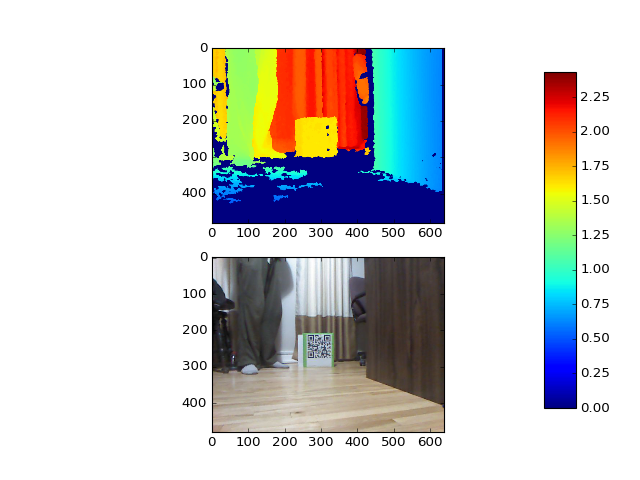

1.61669
1.61669
0.0
0.0 (204.8406982421875, 289.7889404296875)


/home/vabic/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/vabic/.virtualenvs/cv/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.0

In [58]:
# robot.linear_movement_precise(1*0.3, 0.1)
find_z()

In [ ]:
# liste = scan_inlines()
# rotate_to_max(liste)
while(True):
    scan_for_max_inlines(PI/8,1)
    scan_for_max_inlines(-PI/16,0.5)
    robot.linear_movement_precise(find_z()*0.8, 0.1)
    robot.angular_movement(PI/4,2)



In [ ]:
# depth_sensor = KinectDepthSensor()
# robot.add_sensor(depth_sensor)
# time.sleep(1)
# depth_data=depth_sensor.peek_data()
# time.sleep(2)
# print(depth_data)